In [32]:
import numpy as np
from scipy import stats,interpolate,optimize
import matplotlib.pyplot as plt
import seaborn as sns
from utils import datasets,matrix,affinity
from sklearn import cluster,decomposition
import utils.transforms as tf
import utils.clustermetrics as cm

In [ ]:
def cdf(set):
    n = len(set)
    x = np.sort(set)
    y = np.linspace(0, 1, n)
    spline = interpolate.interp1d(x, y, kind='previous', bounds_error=False, fill_value = (0, 1), assume_sorted=True)
    return spline

def kstest_confidence(set1, set2):
    # get set lengths
    m = len(set1)
    n = len(set2)
    # generate cdfs from sets
    f1 = cdf(set1)
    f2 = cdf(set2)
    # Find the maximum difference between the two functions
    def objective(x):
        return -np.abs(f1(x)-f2(x))
    res = optimize.minimize_scalar(objective, bounds=[0, 1], method='bounded')
    # Compare this distance with the K-S test function to get the confidence, alpha
    ksD = res.x
    alpha = 2*np.exp(-ksD**2 * n*m/(n+m))
    return alpha

In [2]:
realdata = datasets.window_data()
synthdata = datasets.synthetic_paindata()
scrambledata = datasets.scrambled(replacement=False)
randomdata = datasets.uniform_random()

In [3]:
dataset = realdata
n_clusters = 3
cat_values = datasets.get_category('AnyLong')

data = tf.interpolate_data(dataset, kind='linear')
affinity_matrix = affinity.euclidean_affinity(data)
clustering = cluster.SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
labels = clustering.fit_predict(affinity_matrix)
labels = matrix.relabel(data, labels)

In [4]:
# Define groups for mann-whitney test
inds1 = np.where(cat_values<0.5)[0]
inds2 = np.where(cat_values>0.5)[0]
not_chronic = data[inds1, :]
chronic = data[inds2, :]

MannwhitneyuResult(statistic=1176.0, pvalue=6.977622325072313e-07)
9.321974876987967e-09


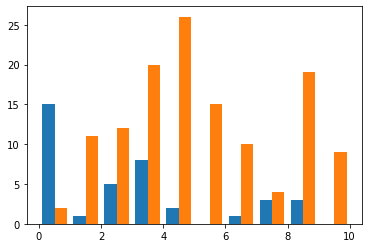

In [35]:
plt.hist([np.mean(not_chronic, axis=1), np.mean(chronic, axis=1)], bins=range(0, 11))
print(stats.mannwhitneyu(np.mean(chronic, axis=1), np.mean(not_chronic, axis=1)))
print(kstest_confidence(np.mean(chronic, axis=1), np.mean(not_chronic, axis=1)))

In [21]:
# Groups identified by clustering
inds1 = np.where(labels==0)[0]
group1 = data[inds1, :]
inds2 = np.where(labels==1)[0]
group2 = data[inds2, :]
inds3 = np.where(labels==2)[0]
group3 = data[inds3, :]

MannwhitneyuResult(statistic=4.0, pvalue=4.0439198005458226e-16)
2.2678717643941775e-07
MannwhitneyuResult(statistic=0.0, pvalue=3.5307003972588876e-12)
1.78425382851996e-05
MannwhitneyuResult(statistic=0.0, pvalue=1.3737676408004562e-19)
3.472174266053518e-12


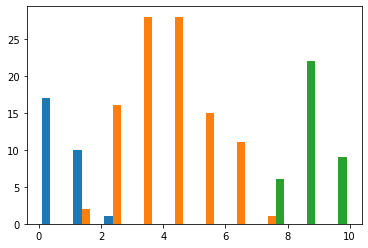

In [39]:
plt.hist([np.mean(group1, axis=1), np.mean(group2, axis=1), np.mean(group3, axis=1)], bins=range(0, 11))
print(stats.mannwhitneyu(np.mean(group1, axis=1), np.mean(group2, axis=1)))
print(kstest_confidence(np.mean(group1, axis=1), np.mean(group2, axis=1)))
print(stats.mannwhitneyu(np.mean(group1, axis=1), np.mean(group3, axis=1)))
print(kstest_confidence(np.mean(group1, axis=1), np.mean(group3, axis=1)))
print(stats.mannwhitneyu(np.mean(group2, axis=1), np.mean(group3, axis=1)))
print(kstest_confidence(np.mean(group2, axis=1), np.mean(group3, axis=1)))